Fraction of pauses for each recording [0.018857142857142895, 0.021953488372093086, 0.00972916666666656, 0.01428571428571415]
Number of pauses per second [1.3333333333333333, 1.2790697674418605, 3.0, 1.0952380952380953]
Fraction of uh-s for each recording [0.0, 0.0, 0.0, 0.0]
Number of uh-s per second [0.0, 0.0, 0.0, 0.0]
Fraction of um-s for each recording [0.0, 0.0, 0.0, 0.0]
Number of um-s per second [0.0, 0.0, 0.0, 0.047619047619047616]
Binary Classification:  [0, 0, 1, 1]
create dataframe from dictionary
Normalizing data
Preprocessing done
Preparing classification task
Data Exploration
Correlation plots


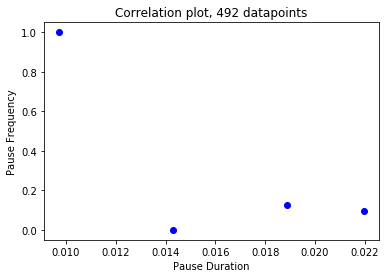

Classification


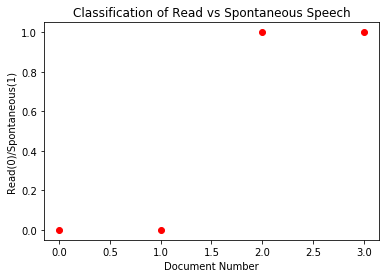

In [65]:
import os, json
import pandas as pd, numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import f1_score
# from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter



# this finds our json files
path_to_json = './json_data'

#stop_list = list(STOPWORDS) + ["sil", "uh"]
filler_words = ["uh", "um"]


VOCAB = set()
score_dict = {}
tot = {}
voc_dict = {}
vocab_list = []


new_dict = {}
new_dict["pause_duration"] = []
new_dict["no_of_pauses"] = []
new_dict["uh_duration"] = []
new_dict["no_of_uh"] = []
new_dict["um_duration"] = []
new_dict["no_of_um"] = []
new_dict["binary_classifier"] = []
# new_dict["scores"] = []
# new_dict["binary_label"] = []

pause_duration = []
pause_per_sec = []
setter = set()
inter = set()

# we need both the json and an index number so use enumerate()
for subdir, dirs, files in os.walk(path_to_json):
      for file in files:
        if file.endswith(".json"):
            path = os.path.join(subdir, file)
    
            with open(path, 'r') as f:
                json_text = json.load(f)
            id_ = json_text["id"]
            feature_dict = {}

            score = json_text["score"]

            if score < 5:
                print("OUTLIER")
                continue

#             new_dict["scores"].append(score)


            
            elapsed_time = json_text["elapsed_time"]
            counter_pauses = 0
            counter_uh = 0
            counter_um = 0
            for tok in json_text["tokens"]:
                Text = tok["text"].lower()
                if (Text == "sil"):
                    pause_time = tok["end_time"] - tok["start_time"]
                    counter_pauses += 1
                else:
                    pause_time = 0
                if (Text == "uh"):
                    print(Text)
                    uh_time = tok["end_time"] - tok["start_time"]
                    counter_uh += 1
                else:
                    uh_time = 0
                if (Text == "um"):
                    um_time = tok["end_time"] - tok["start_time"]
                    counter_um += 1
                else:
                    um_time = 0
            new_dict["pause_duration"].append(pause_time/elapsed_time)
            new_dict["no_of_pauses"].append(counter_pauses/elapsed_time)

                
            new_dict["uh_duration"].append(uh_time/elapsed_time)
            new_dict["no_of_uh"].append(counter_uh/elapsed_time)


            new_dict["um_duration"].append(um_time/elapsed_time)
            new_dict["no_of_um"].append(counter_um/elapsed_time)
    
#     classifying Read and Spontaneous Speech
        if subdir.endswith("Read"):
            binary = 0
        else:
            binary = 1
        new_dict["binary_classifier"].append(binary)
            
print("Fraction of pauses for each recording", new_dict["pause_duration"])
print("Number of pauses per second", new_dict["no_of_pauses"])

print("Fraction of uh-s for each recording", new_dict["uh_duration"])
print("Number of uh-s per second", new_dict["no_of_uh"])

print("Fraction of um-s for each recording", new_dict["um_duration"])
print("Number of um-s per second", new_dict["no_of_um"])

print("Binary Classification: ", new_dict["binary_classifier"])

#             f_1 = 



#             feature_dict["new_words_pr_min"] = f_1


#             # repeated words pr min
# #             f_2 = 
#             new_dict["f_1"].append(f_1)
#             new_dict["f_2"].append(f_2)
    
            
#             feature_dict["time"] = json_text["elapsed_time"]
#             tot[id_] = feature_dict
    
#             voc_dict[id_] = doc_vocab
    
# #             f_3 = 
#             new_dict["f_3"].append(f_3)            

#             # Labelling process



print("create dataframe from dictionary")
df = pd.DataFrame.from_dict(new_dict)

print("Normalizing data")
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if "f_" in feature_name:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df = normalize(df)

# #print(df)

print("Preprocessing done")
print("Preparing classification task")


print("Data Exploration")

# Data exploration


# #############
print("Correlation plots")
plt.plot(df["pause_duration"], df["no_of_pauses"], 'bo')
plt.xlabel('Pause Duration')
plt.ylabel('Pause Frequency')
plt.title('Correlation plot, 492 datapoints')
plt.show()


print("Classification")
plt.plot(df["binary_classifier"], 'ro')
plt.xlabel('Document Number')
plt.ylabel('Read(0)/Spontaneous(1)')
plt.title('Classification of Read vs Spontaneous Speech')
plt.show()

# plt.plot(df["no_of_pauses"], df["f_3"], 'bo')
# plt.xlabel('Distinct words pr sek')
# plt.ylabel('Special words')
# plt.title('Correlation plot, 492 datapoints')
# plt.show()

# plt.plot(df["f_1"], df["f_4"], 'bo')
# plt.xlabel('Distinct words pr sek')
# plt.ylabel('TF IDF')
# plt.title('Correlation plot, 492 datapoints')
# plt.show()

# plt.plot(df["f_4"], df["scores"], 'bo')
# plt.xlabel('TF IDF')
# plt.ylabel('Gweek Score')
# plt.title('Correlation plot, 492 datapoints')
# plt.show()

# dicter = Counter(vocab_list)

# wordcloud = WordCloud(
#     background_color='white',
#     stopwords=stop_list,
#     max_words=200,
#     max_font_size=80,
#     random_state=42
# ).generate_from_frequencies(dicter)

# fig = plt.figure(1)
# plt.imshow(wordcloud)
# plt.title("Word Cloud, 492 datapoints")
# plt.axis('off')
# plt.show()


# # Training

# print("--------------------------------------")
# print("Preparing binary classification task")

# y = df.iloc[:,-2]
# X = df.iloc[:,:-3]


# # Training -------------------------------------
# # splitting
# from sklearn.model_selection import train_test_split
# a_train, a_test, b_train, b_test = train_test_split(X, y, test_size=0.33, random_state=42)


# from sklearn.linear_model import LogisticRegression


# LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(a_train, b_train)
# predicted = LR.predict(a_test)
# print("F1-score BINARY")
# print(f1_score(predicted, np.array(b_test), average='weighted'))
# #print(round(LR.score(predicted, np.array(b_test))))




